## Introduction to Functions

### Why do we need functions?

- Functions allow us to encapsulate logic in our code 
- They can be defined using the `def` keyword

In [1]:
def get_student_grade(score):
    if score > 90:
        grade = 'A'
    elif score > 80:
        grade = 'B'
    elif score > 70:
        grade = 'C'
    elif score > 50:
        grade = 'D'
    else:
        grade = 'F'
    return grade

scores = [85,66,78,34,55]
for n,i in enumerate(scores):
    grade = get_student_grade(i)
    print(f'Grade for student {n+1} is {grade}')

Grade for student 1 is B
Grade for student 2 is D
Grade for student 3 is C
Grade for student 4 is F
Grade for student 5 is D


### Positional arguments

Python will match the list of arguments (that you provide when you call a function) with a list of parameters (that are part of the function definition). 

In [2]:
# Positional arguement -->
my_func(1)
my_func(1,2)

NameError: name 'my_func' is not defined

In [3]:
# Keyword arguement -->
my_func(a=1)
my_func(a=1,b=2)

NameError: name 'my_func' is not defined

In [10]:
def my_func(a,b,c): # a,b,c are the parameters because they are part of the function definition
    print(f'a is {a}')
    print(f'b is {b}')
    print(f'c is {c}')

In [7]:
my_func(10,20)

TypeError: my_func() missing 1 required positional argument: 'c'

In [11]:
my_func(10,20,30)

a is 10
b is 20
c is 30


In [12]:
a = 30
b = 20
c = 10
my_func(c,b,a)

a is 10
b is 20
c is 30


### Keword arguments 

Keyword (or named) arguments are passed into the function along with a parameter name.

In [13]:
# Keyword arguement -->
my_func(a=1)
my_func(a=1,b=2)

TypeError: my_func() missing 2 required positional arguments: 'b' and 'c'

In [14]:
my_func(a=10,b=20,c=30)

a is 10
b is 20
c is 30


In [15]:
my_func(c=20,b=10,a=30)

a is 30
b is 10
c is 20


### Default arguments

Default arguments are optional (i.e. the user does not need to specify them when calling the function). They default to a value if they are not specified during function call.

In [16]:
def my_func(a=10):
    print(a)

In [17]:
my_func(20)

20


In [18]:
my_func('Hello')

Hello


In [19]:
my_func()

10


In [22]:
my_func(a='Hello')

Hello


We can mix and match positional (non-default) and default arguments

In [23]:
def my_func(a,b='Hello'):
    print(a)
    print(b)

In [24]:
my_func(10,20)

10
20


In [25]:
my_func('HELLO')

HELLO
Hello


Note: a non-default argument cannot follow a default argument in the function definition

In [26]:
def my_func(a=10,b):
    print(a)
    print(b)

SyntaxError: non-default argument follows default argument (<ipython-input-26-f36d186f116b>, line 1)

In [27]:
def my_func(a,b,c,d=10,e=20,f=30):
    pass

### Pitfall: Mutable default arguments

We need to be careful when we use mutable default arguments. This is because default arguments are created only when the function is defined. When you make changes to this mutable default argument, this will also persist across function calls.

In [28]:
# Example without a default argument
def append_to_list(x, my_list):
    my_list.append(x)
    return my_list

In [29]:
append_to_list(10,[])

[10]

In [36]:
append_to_list(20,[])

[20]

In [31]:
append_to_list(20,[5,10,15])

[5, 10, 15, 20]

In [32]:
# Example with a mutable default argument
def dodgy_append_to_list(x, my_list=[]):
    my_list.append(x)
    return my_list

In [33]:
dodgy_append_to_list(10)

[10]

In [37]:
dodgy_append_to_list(20) # expect the answer to be [20]

[10, 20, 20, 20]

What happens is that when a function is defined, a new list is created. But the same list is reused in each successive calls to the function.


**The default arguments are only evaluated once when the function is defined, not each time when the function is called.** So if we use a mutable default argument (such as a list), then it will get mutated each time we call a function.

In [38]:
def append_to_list_2(x, my_list=None):
    if my_list is None:
        my_list = []
    my_list.append(x)
    return my_list 

#### Concept check

In [39]:
def f(x):
    return (3*x*x)+(2*x)-5

In [69]:
def func_key_time(f, x, eps = 0.00000000001):
    slope1 = (f(x+eps) - f(x)) /(eps)
    print(slope1)
    
    accuracy_def = slope1 - (6*x + 2)
    accuracy_percent = (accuracy_def/slope1)*100
    print(f'The percentage difference between this method and the actual answer is {accuracy_percent}%')
    

In [70]:
func_key_time(f,1)

8.000000661922968
The percentage difference between this method and the actual answer is 8.274036415312195e-06%


## Variable number of arguments

We can define a function with a variable number of arguments by using the `*args` and `**kwargs` syntax.

- `*args` - arbitrary number of positional arguments
- `**kwargs` - arbitrary number of keyword arguments

### Using `*args`

Example: Say you want to write a function that adds a set of numbers whose count is unknown

In [71]:
def args_example(*args):
    print(f'type(args): {type(args)}')
    print(args)
    print('****')
    return args

In [72]:
args = args_example(1,2,3,4,5)

type(args): <class 'tuple'>
(1, 2, 3, 4, 5)
****


In [73]:
args = args_example(1,2,3)

type(args): <class 'tuple'>
(1, 2, 3)
****


In [74]:
args = args_example(10,20,'CE02','Caitlin','Magnus',[])

type(args): <class 'tuple'>
(10, 20, 'CE02', 'Caitlin', 'Magnus', [])
****


We can also mix positional and `*args`

In [75]:
def mix_positional_and_args(a,b,*args):
    print(f'a is {a}')
    print(f'b is {b}')
    print(f'args are {args}')


In [76]:
mix_positional_and_args('Hello',12,[],1234,'World','CE02')

a is Hello
b is 12
args are ([], 1234, 'World', 'CE02')


We cannot have `*args` before the positional arguments

In [77]:
def incorrect_mix_positional_and_args(*args,a,b,c):
    pass

In [78]:
incorrect_mix_positional_and_args('Hello',12,[],1234,'World','CE02')

TypeError: incorrect_mix_positional_and_args() missing 3 required keyword-only arguments: 'a', 'b', and 'c'

Example: say you want to write a function that adds a collection of numbers whose count is unknown

In [81]:
def sum_of_numbers(*args):
    total_sum = 0
    for i in args:
        total_sum = total_sum + i
    print(total_sum)

In [82]:
sum_of_numbers(1,2,3,4,5,6)

21


### Using `**kwargs`

In [83]:
def kwargs_example(**kwargs):
    print(f'type(kwargs): {type(kwargs)}')
    print(kwargs)
    print('****')

In [84]:
kwargs_example(x=1,y=2,z=3,name='jeevan')

type(kwargs): <class 'dict'>
{'x': 1, 'y': 2, 'z': 3, 'name': 'jeevan'}
****


In [85]:
kwargs_example(1,2,3,'jeevan')

TypeError: kwargs_example() takes 0 positional arguments but 4 were given

In [86]:
kwargs_example(test='Test')

type(kwargs): <class 'dict'>
{'test': 'Test'}
****


- kwargs are useful when we may only want to change a subset of the total number of arguments from their default values
- They are also useful when we have functions that call other functions

In [94]:
import matplotlib.pyplot as plt
import numpy as np
def plot_this_data(data, **kwargs):
    x = data[0]
    y = data[1]
    y1 = np.log(y)
    
    plt.plot(x,y1,**kwargs)

In [95]:
data = np.array([[1,2,3,4,5],[10,100,1000,10000,100000]])

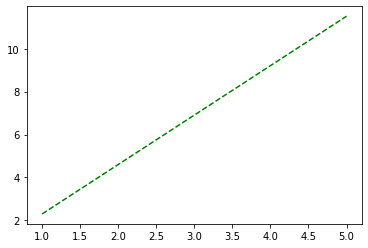

In [96]:
plot_this_data(data,color='green', linestyle='--')

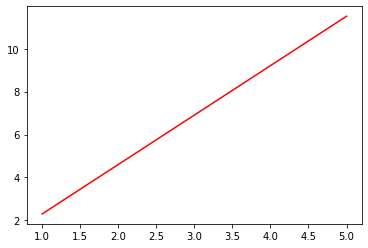

In [97]:
plot_this_data(data, color='red')

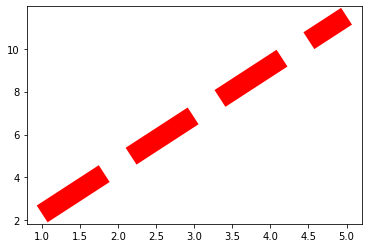

In [98]:
plot_this_data(data, color='red', linewidth='20', linestyle='--')

### A general template for a function

In [99]:
def my_func(*args, **kwargs):
    print(args)
    print(kwargs)

In [101]:
my_func(1,2,a=1,b=35,c='Hello')

(1, 2)
{'a': 1, 'b': 35, 'c': 'Hello'}


Note: Positional arguments cannot follow keyword arguments

In [104]:
my_func(a=1,b=2,3,4)

SyntaxError: positional argument follows keyword argument (<ipython-input-104-6820301141ef>, line 1)

We can also mix and match standard positional and keyword arguments and `*args` and `**kwargs`

In [107]:
def my_func_mix(a,b,*args,x=5,y=10,**kwargs):
    print(a)
    print(b)
    print(args)
    print(x)
    print(y)
    print(kwargs)

In [108]:
my_func_mix(1,2,3,4,x=10,y=20,z=30,abc=40)

1
2
(3, 4)
10
20
{'z': 30, 'abc': 40}


Using the * to unroll a list or tuple into positional arguments

In [109]:
def my_func(name,loc):
    print(name)
    print(loc)

In [112]:
my_list = ['Jeevan','Derby']
print(my_list)
print(*my_list)

['Jeevan', 'Derby']
Jeevan Derby


In [111]:
my_func(*my_list)

Jeevan
Derby


Using the `**` to unroll a dictionary into keyword arguments

In [302]:
my_dict = {'name':['James','Dandison'],'loc':['New York','Chicago']}
print(my_dict)

{'name': ['James', 'Dandison'], 'loc': ['New York', 'Chicago']}


In [114]:
my_func(**my_dict)

['James', 'Dandison']
['New York', 'Chicago']


In [119]:
# Above code is the same as this:
my_func(name=['James','Dandison'],loc=['New York','Chicago'])

['James', 'Dandison']
['New York', 'Chicago']


## Parameter Passing

When passing a mutable object into a function, the mutable object can be potentially modified within the function. Functions that mutate (change the value of) their inputs or other parts of the program can have unintended side effects.

In [120]:
# Example: function without side effects
# assume x is an int or a float
def add_five(x):
    return x+5

x = 10
print(add_five(x))

15


In [121]:
print('x: ',x)

x:  10


In [122]:
# Example: function with a side effect
# assume x is a list
def print_list(x):
    while x:
        value = x.pop()
        print(value)

In [123]:
x = [2,4,6,8]
print_list(x)

8
6
4
2


In [124]:
print('x: ',x)

x:  []


## Return values

The return statement specifies what we want to return to the caller. The return value is the output of the function.

If there is no explicit return statement, then `None` is returned when the function terminates.

In [125]:
def return_example():
    print('Test')
    return 25
    print('This statement will not print!')

In [127]:
return_value = return_example()

Test


In [128]:
print(return_value)

25


In [129]:
def return_example():
    print('Test')
    # return 25
    print('This statement will not print!')

In [130]:
return_value = return_example()

Test
This statement will not print!


In [131]:
print(return_value)

None


You can also return multiple values. It is generally good practice to return multiple values in a tuple.

In [132]:
def multiple_return_example():
    a = 10
    b = 20
    return(a,b)

In [133]:
return_value1, return_value2 = multiple_return_example()

In [134]:
print(return_value1)
print(return_value2)

10
20


In [135]:
def none_return_example():
    print('This statement will print!')

In [136]:
return_val = none_return_example()
print(return_val)

This statement will print!
None


In [137]:
def none_return_example():
    print('This statement will print!')
    return 0

In [138]:
return_val = none_return_example()
print(return_val)

This statement will print!
0


## Scoping rules

When a function is executed, a new namespace is created.

The namespace is a local environment that contains the names of function parameters and variables.

#### Example 1

Local variables ovveride global variables inside the local scope

In [139]:
a = 10
b = 20

def my_func(a,b):
    print('Local variable a: ',a)
    print('Local variable b: ',b)

In [141]:
my_func(100,200)
print(a)
print(b)

Local variable a:  100
Local variable b:  200
10
20


#### Example 2

In [142]:
a = 123
def my_func():
    a = 789
    print('a inside my_func: ',a)
    print('id(a) inside my_func: ', id(a))

In [143]:
my_func()

a inside my_func:  789
id(a) inside my_func:  2149559516272


In [144]:
print('a outside my_func: ',a)
print('id(a) outside my_func: ', id(a))

a outside my_func:  123
id(a) outside my_func:  140716918388336


#### Example 3

You can modify variables in the global scope from a local scope by explicitly using the `global` keyword.

In [145]:
a = 4
b = 6

def my_func():
    global b
    a = 40
    b = 60
    print('a inside my_func: ',a)
    print('b inside my_func: ',b)
    

In [146]:
my_func()

a inside my_func:  40
b inside my_func:  60


In [147]:
print('a outside my_func: ',a)
print('b outside my_func: ',b)

a outside my_func:  4
b outside my_func:  60


#### Example 4

If the variable is not in the local scope, Python looks at the level above

In [148]:
z1 = 25
def my_func():
    print(z1)

In [149]:
my_func()

25


#### Example 5 

Modifying variables in the global scope is possible for mutable objects

In [155]:
a = [1,2,3]
def my_func():
    a.append(4)

In [156]:
my_func()
print(a)

[1, 2, 3, 4]


## Decorators

(Not in the assessment)

A decorator is a function whose primary purpose is to decorate or modify another function.

Decorators are denoted by the `@` symbol

```
# The add_five function is decorated by my_decorator
@my_simple_decorator
def add_five(x):
    return x+5
```
```
The above code is equivalent to the following:
def add_five(x):
    return x+5
add_five = my_simple_decorator(add_five) # my decorator returns the modified/decorated version of add five.
```

Thing to keep in mind: **The input to the decorator is a function, and the output of the decorator is a modified version of the same function**

In [160]:
# General template for a decorator
def my_decorator(my_func):
    def modify_my_func(*args, **kwargs):
        print('Some code to decorate my_func before it executes')
        result = my_func(*args, **kwargs)
        print('Some code to decorate my_func after it executes')
        return result
    return modify_my_func

In [161]:
def add_five(x):
    print(x+5)

In [163]:
add_five(100)

105


In [164]:
# A decorated function
@my_decorator
def add_five(x):
    print(x+5)

In [165]:
add_five(100)

Some code to decorate my_func before it executes
105
Some code to decorate my_func after it executes


In [170]:
# Another decorator example

def decorative_borders(f):
    def modified_f(*args, **kwargs):
        print('****************')
        print('----------------')
        result = f(*args,**kwargs)
        print('----------------')
        print('****************')
        return result
    return modified_f
    

In [171]:
@decorative_borders
def print_message(text):
    print(text)

In [172]:
print_message('You have won a grand prize!')

****************
----------------
You have won a grand prize!
----------------
****************


In [173]:
# yet another decorator example

def my_divide(a,b):
    print(a/b)

In [174]:
my_divide(5,0)

ZeroDivisionError: division by zero

In [307]:
# decorator to check for zero division 
def check_for_zero_division(my_func):
    def modified_my_func(a,b):
        if b==0: 
            print('Cannot divide by zero!')
            return None
        return my_func(a,b)
    return modified_my_func


In [308]:
@check_for_zero_division
def my_divide(a,b):
    print(a/b)

In [309]:
my_divide(5,1)

5.0


#### Concept check

In [212]:
def time_decorator(my_func):
    def modified_my_func(*args,**kwargs):

        import datetime as dt
        import time
        start = dt.datetime.now()
        result = my_func(*args,**kwargs)
        time.sleep(1) # as an example, this function takes 1 seconds to execute
        end = dt.datetime.now()
        print(end-start)
        return result
    return modified_my_func

In [213]:
@time_decorator
def my_divide(a,b):
    print(a/b)

In [214]:
my_divide(20,5)

4.0
0:00:01.000677


## Generators

Generator functions use `yield` keyword to return values. They return an iterable sequence of values.

They are very useful because they allow us to iterate through the values without creating and storing the entire sequence in memory.

In [215]:
def countdown(n):
    while n>0:
        yield n # yield instead of return
        n-=1

In [216]:
g = countdown(10)
type(g)

generator

In [219]:
next(g) #yields the next value in the generator

8

In [221]:
g = countdown(5)

In [222]:
for i in g: # g is an iterable object so it can be used in a for loop
    print(i)

5
4
3
2
1


In [223]:
# convert a generator into a list
g = countdown(15)
list(g)

[15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

Once all elements are yielded, the generator will throw a `StopeIterationError` if called again

In [228]:
def print_names():
    yield 'Matthew'
    yield 'Dandison'
    yield 'Micheal'
    yield 'Gian'
    yield 'Caitlin'
    yield 'Finn'

In [229]:
g = print_names()

In [232]:
next(g) # result after running this command 3 times

'Micheal'

In [234]:
list(g) # remaining items on the list

[]

## Comprehensions 

### List comprehensions

List comprehensions give us an easy way to apply a function to all elements in an iterable object.

Results are returned as a list, i.e. the comprehension pattern is enclosed by a pair of square `[]` brackets

In [235]:
# Multiply all numbers from 1 to 10 by 20 and store it in a list (long way)
result = []
for i in range(1,11):
    result.append(i*20)
print(result)

[20, 40, 60, 80, 100, 120, 140, 160, 180, 200]


In [236]:
# List comprehension (short way)
[i*20 for i in range (1,11)]

[20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

We can also use the `if` keyword for filtering (e.g. perform operation for only even numbers)

In [237]:
[i*20 for i in range (1,11) if i%2==0]

[40, 80, 120, 160, 200]

We can also apply a custom function to each element in this iterable object 

In [238]:
def my_func(x):
    return x**2 + 5*x + 6

In [239]:
my_list = [my_func(x) for x in [1,2,3,4,5]]
print(my_list)

[12, 20, 30, 42, 56]


#### Concept check

In [240]:
[i for i in range (200,301) if i%7 == 0]

[203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273, 280, 287, 294]

### Generator comprehensions

Very similar to list comprehensions, except the results are returned as a generator rather than a list.

We enclose the comprehension pattern with `()` rather than `[]`.

In [243]:
def squared(x):
    return x**2

In [246]:
g = (squared(num) for num in (1,2,3,4,5))

In [245]:
list(g)

[1, 4, 9, 16, 25]

In [247]:
for num in g:
    print(num)

1
4
9
16
25


## Lambda functions

Lambda function are also known as anonymous functions. They are used for ad-hoc function definitions.

In [248]:
# normal way to define a function
def cube(x):
    return x**3

cube(3)

27

In [250]:
# The above can be written as a lambda function:
cube = lambda x : x**3
cube(3)

27

In [252]:
func_key_time(lambda x : x**2 + 5*x + 6, 10)

24.999735614983365
The percentage difference between this method and the actual answer is -148.0026227271014%


You can also have multiple parameters in a lambda function

In [253]:
def power(x,y):
    if y>0:
        return x**y
    else:
        return None

In [257]:
power_lambda = lambda x,y : x**y if y>0 else None

`lamda <inputs> : <return_if_true> if <condition> else <return_if_false>`

In [258]:
power_lambda(2,3)

8

## Other convenience functions

- Zip
- Map 
- Filter

### Zip

Zip function allows us to combine two (or more) collections into a collection of tuples
- It provides us with a way of pairing together the elements from multiple iterables.
- `zip` only works as far as the shortest iterable by length.

In [310]:
name = ['Tony stark','Peter Parker','Bruce Banner','Steve Rogers']
alias = ['Iron man', 'Spiderman', 'Hulk','Captain America']
number = [1,2,3,4]

In [312]:
my_zip = list(zip(name,alias))
print(my_zip)

[('Tony stark', 'Iron man'), ('Peter Parker', 'Spiderman'), ('Bruce Banner', 'Hulk'), ('Steve Rogers', 'Captain America')]


In [273]:
my_zip2 = list(zip(name,alias,number))
print(my_zip2)

[('Tony stark', 'Iron man', 1), ('Peter Parker', 'Spiderman', 2), ('Bruce Banner', 'Hulk', 3), ('Steve Rogers', 'Captain America', 4)]


`zip` only works as far as the shortest iterable

In [260]:
tuple_a = (2,4,6)
tuple_b = (1,3,5,7)
list(zip(tuple_a,tuple_b))

[(2, 1), (4, 3), (6, 5)]

`zip` objects can be used directly for iteration

In [270]:
for a,b in my_zip:
    print(f'{a} is {b}')

Tony stark is Iron man
Peter Parker is Spiderman
Bruce Banner is Hulk
Steve Rogers is Captain America


You can also create a dictionary from a list of tuples

In [274]:
my_dict = dict(zip(name,alias))
print(my_dict)

{'Tony stark': 'Iron man', 'Peter Parker': 'Spiderman', 'Bruce Banner': 'Hulk', 'Steve Rogers': 'Captain America'}


### Map 
The map function allows us to apply a function to each element in an iterable object, returning a generator-like object, that in turn can be iterated over.

In [280]:
my_list = [1,2,3,4,5]
def square(x):
    return x**2

In [285]:
my_map = map(square, my_list) # This returns a map object

In [282]:
type(my_map)

map

In [283]:
for i in my_map:
    print(i)

1
4
9
16
25


In [286]:
list(my_map)

[1, 4, 9, 16, 25]

#### Concept check

In [287]:
list(map(lambda x: x**0.5, my_list))

[1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979]

### Filter
The filter function is used to filter an iterable object by condition

In [296]:
my_list = [1,2,3,4,5,6,7,8,9,10]
my_filter = filter(lambda x : x%2==1,my_list)

In [293]:
type(my_filter)

filter

In [294]:
for i in my_filter:
    print(i)

1
3
5
7
9


In [297]:
list(my_filter)

[1, 3, 5, 7, 9]